In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

We read data pre-edited with the help of SAS from the file "final_sorted_export2.csv"

(SAS-code that creates "final_sorted_export2.csv" from "int20h-ds-test-dataset.csv" in the current directory)

In [2]:
filename2 = "final_sorted_export2.csv"
df2 = pd.read_csv(filename2)
df2.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,AccountHistoryTransactionDetails,Account_Setup_Profile_Skip,...,Order,Reset_Password_Set,Sign_Out,Sign_Up_Error,Sign_Up_Success,Subscription_Premium,Subscription_Premium_Cancel,Subscription_Premium_Renew,Transaction_Refund,Wallet_Opened
0,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",19JAN22:18:48:08,android,samsung,SM-A716U,"{""Navigated From"":""Account History"",""Status"":""...",N,...,N,N,N,N,N,N,N,N,N,N
1,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",19JAN22:18:48:44,android,samsung,SM-A716U,"{""Navigated From"":""Account History"",""Status"":""...",N,...,N,N,N,N,N,N,N,N,N,N
2,0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,"{""Payment Method"":""Debit"",""Tokenized Pay"":""""}",19JAN22:18:47:45,android,samsung,SM-A716U,N,N,...,N,N,N,N,N,N,N,N,N,N
3,0006869712ec9841dc36234bce245203,MD,Add Vehicle Success,"{""Make"":""Chevrolet"",""Model"":""Express 3500"",""Co...",19JAN22:18:50:34,android,samsung,SM-A716U,N,N,...,N,N,N,N,N,N,N,N,N,N
4,0006869712ec9841dc36234bce245203,MD,Subscription Premium,"{""Start Date"":""2022-01-19"",""Renewal Date"":""202...",19JAN22:18:48:01,outofband,NaN,NaN,N,N,...,N,N,N,N,N,"{""Start Date"":""2022-01-19"",""Renewal Date"":""202...",N,N,N,N


We divide users into those who canceled the subscription premmium and those who did not

In [3]:
canceled_users = pd.DataFrame()
non_canceled_users = pd.DataFrame()

all_id = []
cancel_id = []
non_cancel_id = []

for i in range(len(df2["Subscription_Premium_Cancel"])):
    if df2["Subscription_Premium_Cancel"][i] != "N" and df2["userid"][i] not in cancel_id:
        cancel_id.append(df2["userid"][i])
    elif df2["userid"][i] not in non_cancel_id:
        non_cancel_id.append(df2["userid"][i])


In [4]:
non_cancel_id = list(set(non_cancel_id) - set(cancel_id))

We create columns with users who cancel to subscribe

In [5]:
past_columns = list(df2.columns)
canceled_columns = []
for i in cancel_id:
    for j in past_columns:
        canceled_columns.append(j + " " + i)

In [6]:
canceled_users = pd.DataFrame(columns = canceled_columns)

We create and fill in a new table in which individual columns are attributes tied to specific ids

In [7]:
canceled_users = pd.DataFrame(np.array(np.zeros([100, len(canceled_users.columns)])), columns = canceled_columns )
k = 0
for i in range(len(df2["userid"])):
    if df2["userid"][i] not in cancel_id:
        continue
    if df2["userid"][i] != df2["userid"][i - 1]:
        k = 0
    canceled_users["userid" + " " + df2["userid"][i]][k] = df2["userid"][i]
    canceled_users["user_state" + " " + df2["userid"][i]][k] = df2["user_state"][i]
    canceled_users["event_created_date" + " " + df2["userid"][i]][k] = df2["event_created_date"][i]
    canceled_users["event_platform" + " " + df2["userid"][i]][k] = df2["event_platform"][i]
    canceled_users["device_manufacture" + " " + df2["userid"][i]][k] = df2["device_manufacture"][i]
    canceled_users["device_model" + " " + df2["userid"][i]][k] = df2["device_model"][i]
    canceled_users["AccountHistoryTransactionDetails" + " " + df2["userid"][i]][k] = df2["AccountHistoryTransactionDetails"][i]
    canceled_users["Account_Setup_Profile_Skip" + " " + df2["userid"][i]][k] = df2["Account_Setup_Profile_Skip"][i]
    canceled_users["Account_Setup_Skip" + " " + df2["userid"][i]][k] = df2["Account_Setup_Skip"][i]
    canceled_users["Add_Payment_Method_Failed" + " " + df2["userid"][i]][k] = df2["Add_Payment_Method_Failed"][i]
    canceled_users["Add_Payment_Method_Success" + " " + df2["userid"][i]][k] = df2["Add_Payment_Method_Success"][i]
    canceled_users["Add_Vehicle_Break" + " " + df2["userid"][i]][k] = df2["Add_Vehicle_Break"][i]
    canceled_users["Add_Vehicle_Failed" + " " + df2["userid"][i]][k] = df2["Add_Vehicle_Failed"][i]
    canceled_users["Add_Vehicle_Success" + " " + df2["userid"][i]][k] = df2["Add_Vehicle_Success"][i]
    canceled_users["Calculator_Used" + " " + df2["userid"][i]][k] = df2["Calculator_Used"][i]
    canceled_users["Calculator_View" + " " + df2["userid"][i]][k] = df2["Calculator_View"][i]
    canceled_users["Chat_Conversation_Opened" + " " + df2["userid"][i]][k] = df2["Chat_Conversation_Opened"][i]
    canceled_users["Wallet_Opened" + " " + df2["userid"][i]][k] = df2["Wallet_Opened"][i]
    canceled_users["Transaction_Refund" + " " + df2["userid"][i]][k] = df2["Transaction_Refund"][i]
    canceled_users["Subscription_Premium_Renew" + " " + df2["userid"][i]][k] = df2["Subscription_Premium_Renew"][i]
    canceled_users["Subscription_Premium_Cancel" + " " + df2["userid"][i]][k] = df2["Subscription_Premium_Cancel"][i]
    canceled_users["Subscription_Premium" + " " + df2["userid"][i]][k] = df2["Subscription_Premium"][i]
    canceled_users["Sign_Up_Success" + " " + df2["userid"][i]][k] = df2["Sign_Up_Success"][i]
    canceled_users["Sign_Up_Error" + " " + df2["userid"][i]][k] = df2["Sign_Up_Error"][i]
    canceled_users["Sign_Out" + " " + df2["userid"][i]][k] = df2["Sign_Out"][i]
    canceled_users["Reset_Password_Set" + " " + df2["userid"][i]][k] = df2["Reset_Password_Set"][i]
    canceled_users["Order" + " " + df2["userid"][i]][k] = df2["Order"][i]
    canceled_users["Email_Confirmation_Success" + " " + df2["userid"][i]][k] = df2["Email_Confirmation_Success"][i]
    canceled_users["Chat_Conversation_Started" + " " + df2["userid"][i]][k] = df2["Chat_Conversation_Started"][i]
    k += 1

Find a correlation between the parameters (columns) of users who canceled the subscription

In [8]:
corr_df = canceled_users.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

Sum the correlations between columns of the same type

In [9]:
final_corr = dict()
average = 0

for col in df2.columns:
    final_corr[col] = 0
final_corr
for i in corr_df.columns:
    for j in corr_df.columns:
        for k in df2.columns:
            if k in i and k in j and corr_df[i][j] > 0:
                final_corr[k] += corr_df[i][j]

final_corr

{'userid': 41650.18215984859,
 'user_state': 41650.18215984859,
 'event_name': 0,
 'event_attributes': 0,
 'event_created_date': 53619.30116479128,
 'event_platform': 43517.8591510443,
 'device_manufacture': 32891.11748681954,
 'device_model': 32907.37313150289,
 'AccountHistoryTransactionDetails': 46290.869413637236,
 'Account_Setup_Profile_Skip': 41232.04873814842,
 'Account_Setup_Skip': 41557.543835566445,
 'Add_Payment_Method_Failed': 41564.75280745424,
 'Add_Payment_Method_Success': 40308.42904448705,
 'Add_Vehicle_Break': 41335.15998716157,
 'Add_Vehicle_Failed': 41643.044461065765,
 'Add_Vehicle_Success': 40154.96593666255,
 'Calculator_Used': 41495.570345237065,
 'Calculator_View': 40985.2959802937,
 'Chat_Conversation_Opened': 39080.3055362112,
 'Chat_Conversation_Started': 40722.15932169776,
 'Email_Confirmation_Success': 41563.28341102296,
 'Order': 42396.72133723993,
 'Reset_Password_Set': 41650.18215984859,
 'Sign_Out': 41650.18215984859,
 'Sign_Up_Error': 41652.6950436997

Sort in descending order

In [10]:
final_corr_list = sorted(final_corr.items(), key = lambda x : x[1], reverse = True)
final_corr_list

[('Subscription_Premium', 375443.8410759979),
 ('event_created_date', 53619.30116479128),
 ('AccountHistoryTransactionDetails', 46290.869413637236),
 ('event_platform', 43517.8591510443),
 ('Wallet_Opened', 43223.17000458173),
 ('Order', 42396.72133723993),
 ('Subscription_Premium_Cancel', 41823.85701660773),
 ('Transaction_Refund', 41806.532998658455),
 ('Sign_Up_Error', 41652.69504369971),
 ('Subscription_Premium_Renew', 41652.36694463034),
 ('userid', 41650.18215984859),
 ('user_state', 41650.18215984859),
 ('Reset_Password_Set', 41650.18215984859),
 ('Sign_Out', 41650.18215984859),
 ('Add_Vehicle_Failed', 41643.044461065765),
 ('Add_Payment_Method_Failed', 41564.75280745424),
 ('Email_Confirmation_Success', 41563.28341102296),
 ('Account_Setup_Skip', 41557.543835566445),
 ('Sign_Up_Success', 41512.91369313311),
 ('Calculator_Used', 41495.570345237065),
 ('Add_Vehicle_Break', 41335.15998716157),
 ('Account_Setup_Profile_Skip', 41232.04873814842),
 ('Calculator_View', 40985.295980293

We visualize prioritization

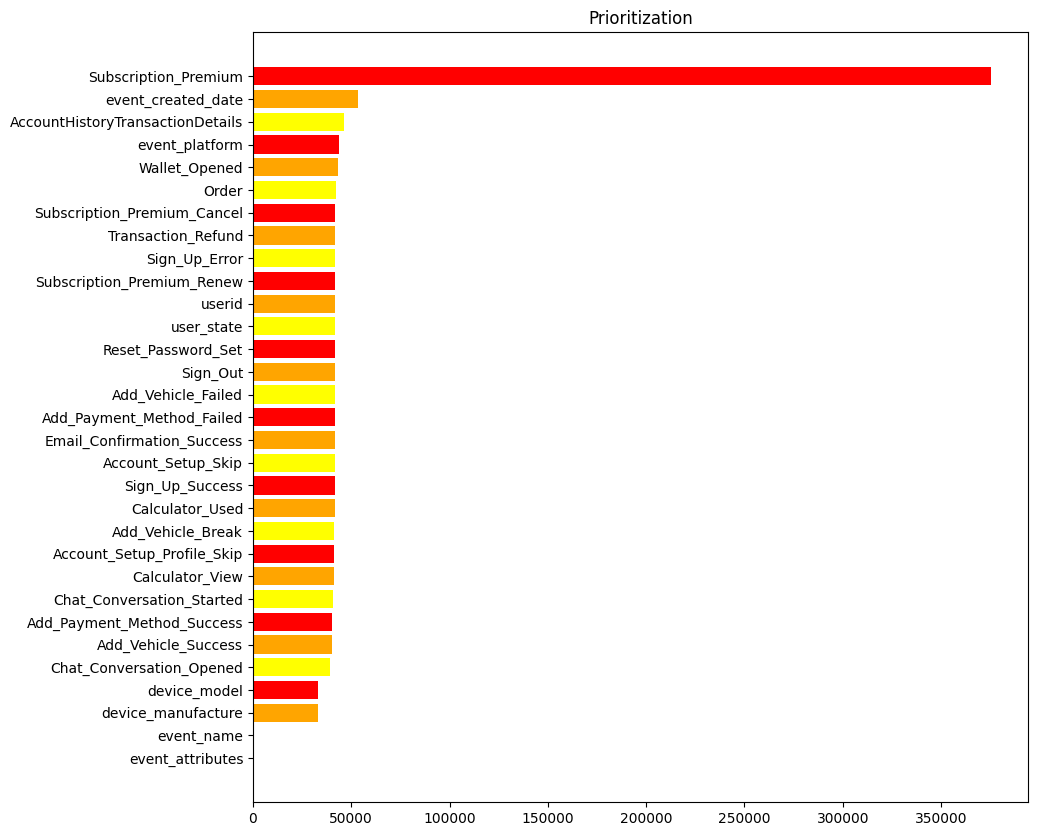

In [11]:
# Extract the names and values from the tuples
names = [x[0] for x in final_corr_list]
values = [x[1] for x in final_corr_list]

plt.figure(figsize=(10,10))

plt.barh(names, values, color=['red','orange','yellow'])
plt.title('Prioritization')

# shown in descending order
plt.gca().invert_yaxis()

plt.show()